In [348]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn-v0_8-colorblind')

In [349]:
n = 3
a = 3
b = 2

H0: t1 = t2 = 0, H1: at least one ti ≠ 0

H0: b1 = b2 = b3 = 0, H1: at least one bj ≠ 0

H0: (tb)11 = (tb)12 = ... = (tb)ab = 0, H1: at least one (tb)ij ≠ 0

In [350]:
Data = pd.read_excel("test.xlsx", sheet_name="Sheet2")

In [351]:
Data

,value,type,method
0,4.0,1,dipping
1,4.5,1,dipping
2,4.3,1,dipping
3,5.6,2,dipping
4,4.9,2,dipping
5,5.4,2,dipping
6,3.8,3,dipping
7,3.7,3,dipping
8,4.0,3,dipping
9,5.4,1,spraying


In [352]:
type_name = Data["type"].unique().tolist()

In [353]:
method_name = Data["method"].unique().tolist()

In [354]:
mean_type = []

for name in type_name:
    mean = Data["value"][Data["type"]==name].mean()
    mean_type.append(mean)

In [355]:
mean_type

[4.783333333333334, 5.683333333333333, 4.5]

In [356]:
mean_method =[]

for name in method_name:
    mean = Data["value"][Data["method"]==name].mean()
    mean_method.append(mean)

In [357]:
mean_method

[4.466666666666667, 5.51111111111111]

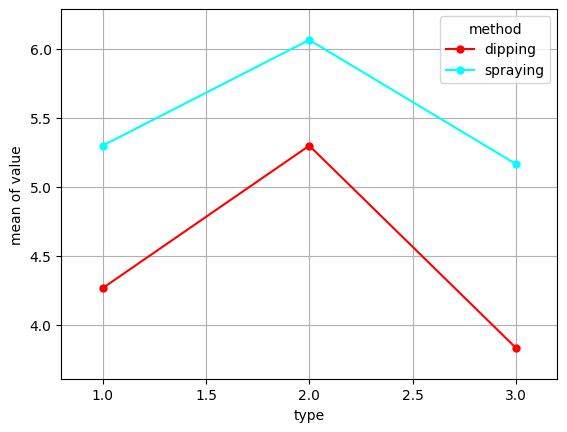

In [358]:
fig = interaction_plot(Data.type, Data.method, Data.value, ms=10)
plt.grid(True)

# Degrees of freedom

supp  = method
dose = type

In [359]:
N = len(Data.value)
df_a = len(Data.method.unique()) - 1
df_b = len(Data.type.unique()) - 1
df_axb = df_a*df_b 
df_w = N - (len(Data.method.unique())*len(Data.type.unique()))

# Anova Table

In [360]:
formula = 'value ~ C(type) + C(method) + C(method):C(type)'
model = ols(formula, Data).fit()
anova_table = anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(type),4.581111,2.0,27.858108,0.000031
C(method),4.908889,1.0,59.702703,0.000005
C(method):C(type),0.241111,2.0,1.466216,0.269342
Residual,0.986667,12.0,NaN,NaN


# B

- $p_{type} < \alpha$, dus nulhypothese wordt verworpen.
- $p_{method} < \alpha$, dus nulhypothese wordt verworpen.
- $p_{combi} > \alpha$, dus nulhypothese wordt geaccepteerd.

In [361]:
ss = anova_table["sum_sq"].tolist()
df = anova_table['df'].tolist()

mse = [ss[i]/df[i] for i in range(len(ss))]
mse

[2.290555555555557,
 4.908888888888882,
 0.12055555555555648,
 0.08222222222222215]

In [362]:
res = model.resid.tolist()
res.sort()
res = np.round(res, 4)

In [363]:
ind= [1]
for i in range(1, len(res)):
    if res[i] == res[i-1]:
        ind.append(ind[i-1])
    else:
        ind.append(i+1)

In [364]:
kans = [(i-0.5)/len(res) for i in ind]
z = stats.norm.ppf(kans)
res = np.transpose(res)
res = res[:,np.newaxis]
az = np.linalg.lstsq(res, z,rcond=None)

In [365]:
stats.norm.ppf(kans)

array([-1.91450583, -1.91450583, -1.08532491, -1.08532491, -0.67448975,
       -0.67448975, -0.35549042, -0.21042839, -0.06968492, -0.06968492,
        0.21042839,  0.21042839,  0.50848806,  0.67448975,  0.67448975,
        1.08532491,  1.08532491,  1.91450583])

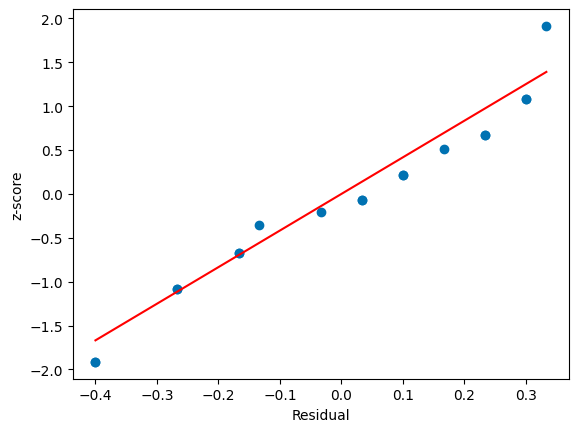

In [366]:
fig, ax1 = plt.subplots(1,1)
ax1.plot(res, az[0]*res, 'r')
ax1.scatter(res, z)
ax1.set_ylabel('z-score')
ax1.set_xlabel('Residual')
plt.show()


<StemContainer object of 3 artists>

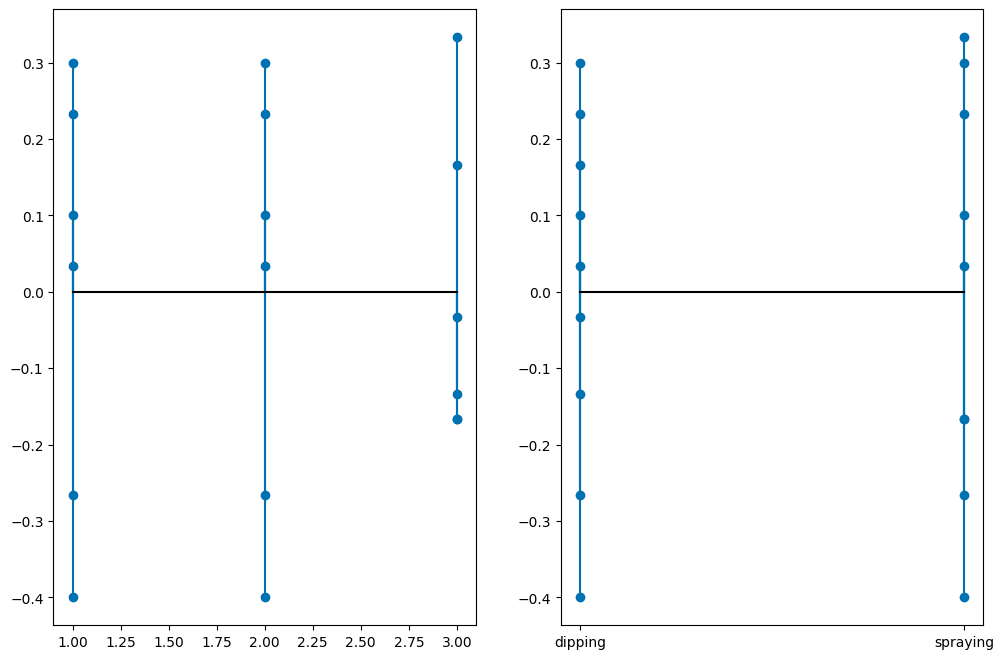

In [367]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8))

ax1.stem(Data.type.values, model.resid, basefmt='k')
ax2.stem(Data.method.values, model.resid, basefmt = 'k')

In [368]:
yhat = mean_type + mean_method - np.mean(mean_method + mean_type)
yhat.shape

(5,)

In [369]:
Data["mean_type"] = np.nan

In [392]:
A_names = Data["type"].unique().tolist()

In [404]:
for i in range(len(A_names)):
    Data["mean_type"][Data["type"] == A_names[i]] = mean_type[i]

/tmp/ipykernel_64486/310240697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["mean_type"][Data["type"] == A_names[i]] = mean_type[i]


In [376]:
Data["mean_method"] = np.repeat(mean_method, n*a)

In [372]:
Data.dropna(axis=1)

,value,type,method,mean_type,mean_method
0,4.0,1,dipping,4.783333,4.466667
1,4.5,1,dipping,4.783333,4.466667
2,4.3,1,dipping,4.783333,4.466667
3,5.6,2,dipping,5.683333,4.466667
4,4.9,2,dipping,5.683333,4.466667
5,5.4,2,dipping,5.683333,4.466667
6,3.8,3,dipping,4.500000,4.466667
7,3.7,3,dipping,4.500000,4.466667
8,4.0,3,dipping,4.500000,4.466667
9,5.4,1,spraying,4.783333,5.511111


In [373]:
np.mean(Data["mean_type"]) + (Data["mean_method"])

0      9.455556
1      9.455556
2      9.455556
3      9.455556
4      9.455556
5      9.455556
6      9.455556
7      9.455556
8      9.455556
9     10.500000
10    10.500000
11    10.500000
12    10.500000
13    10.500000
14    10.500000
15    10.500000
16    10.500000
17    10.500000
Name: mean_method, dtype: float64

In [374]:
yhat = Data["value"].mean() + ( Data["mean_type"] + Data["mean_method"] - np.mean(Data["mean_type"] + Data["mean_method"]))
yhat

0     4.261111
1     4.261111
2     4.261111
3     5.161111
4     5.161111
5     5.161111
6     3.977778
7     3.977778
8     3.977778
9     5.305556
10    5.305556
11    5.305556
12    6.205556
13    6.205556
14    6.205556
15    5.022222
16    5.022222
17    5.022222
dtype: float64

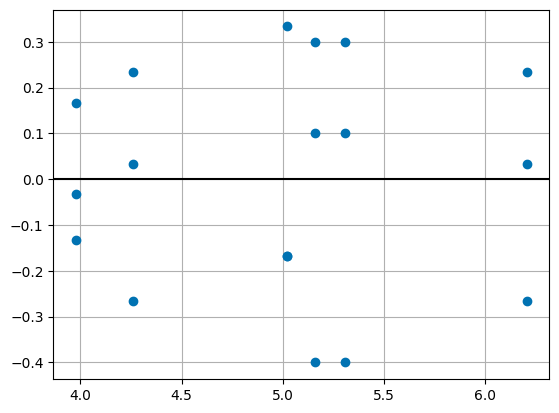

In [375]:
fig, ax = plt.subplots(1,1)
plt.grid(True)
ax.scatter(yhat, model.resid, zorder=3)
ax.axhline(y = 0, color='k')
plt.show()
